In [18]:
import cv2
import numpy as np

def extract_frames(video_path, scale_size=(256, 256)):
    frames = []
    cap = cv2.VideoCapture(video_path)
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frame = cv2.resize(frame, scale_size)
        frames.append(frame)
    cap.release()
    return frames

def stack_frames(frames):
    return np.stack(frames)

def perform_pod(frames_stack):
    # Reshape the stack of frames into a 2D array
    num_frames = frames_stack.shape[0]
    frames_flattened = frames_stack.reshape(-1,num_frames)
    
    # Compute mean and subtract it from the data
    mean_frame = np.mean(frames_flattened, axis=1)
    # print(mean_frame.shape)
    frames_mean_subtracted = np.zeros(frames_flattened.shape)
    for i in range(num_frames):
        frames_mean_subtracted[:,i] = frames_flattened[:,i] - mean_frame
        
    # Singular Value Decomposition (SVD)
    U, S, Vt = np.linalg.svd(frames_mean_subtracted, full_matrices=False)
    
    # Compute the POD modes
    pod_modes = U
    
    return U, S, mean_frame, Vt

# Example usage
video_path = r"C:\Users\shard\OneDrive\Desktop\IITJ\SY\Sem 4\Fluid Mech\3CYL_Flow.mp4"
frames = extract_frames(video_path)
frames_stack = stack_frames(frames)
# print(frames_stack.shape)
U, S, mean_frame, Vt = perform_pod(frames_stack)
# print(pod_modes.shape)
print(U.shape)
print(S.shape)
print(mean_frame.shape) 

(65536, 751)
(751,)
(65536,)


In [4]:
print(S)


[2.92875066e+04 2.91980141e+04 2.91167503e+04 2.84288377e+04
 2.72467124e+04 2.66101859e+04 2.37809824e+04 2.33998316e+04
 2.09895751e+04 2.08006813e+04 1.99732460e+04 1.99576911e+04
 1.94882001e+04 1.92580509e+04 1.87361011e+04 1.83976235e+04
 1.55811716e+04 1.55271733e+04 1.42250615e+04 1.42228049e+04
 1.36013960e+04 1.35705837e+04 1.29806037e+04 1.29279701e+04
 1.21900311e+04 1.21561874e+04 1.16189116e+04 1.16064112e+04
 1.14736603e+04 1.14382593e+04 1.11693839e+04 1.10556666e+04
 1.05789810e+04 1.05406755e+04 9.75776888e+03 9.75265891e+03
 9.15787551e+03 9.14884880e+03 8.80449992e+03 8.78374951e+03
 8.42109480e+03 8.37577174e+03 7.84045997e+03 7.81220229e+03
 7.18595440e+03 7.15971160e+03 6.70075683e+03 6.68476734e+03
 6.28281889e+03 6.26826579e+03 5.77450567e+03 5.76357111e+03
 5.72294957e+03 5.23342776e+03 5.21437148e+03 4.80354064e+03
 4.80152721e+03 4.47356139e+03 4.46406151e+03 4.08181269e+03
 4.05418691e+03 3.61528325e+03 3.60975237e+03 3.47819184e+03
 3.27850496e+03 3.272844

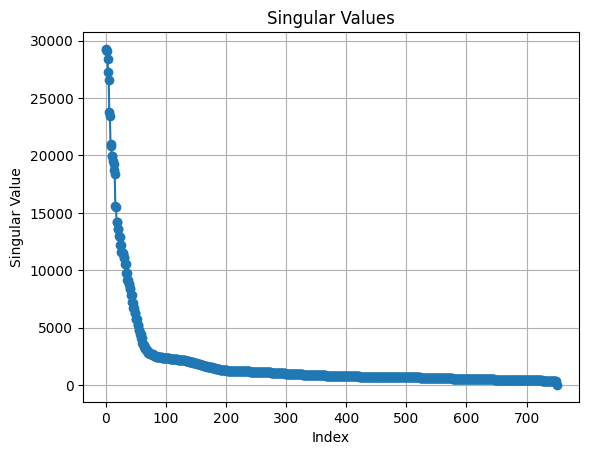

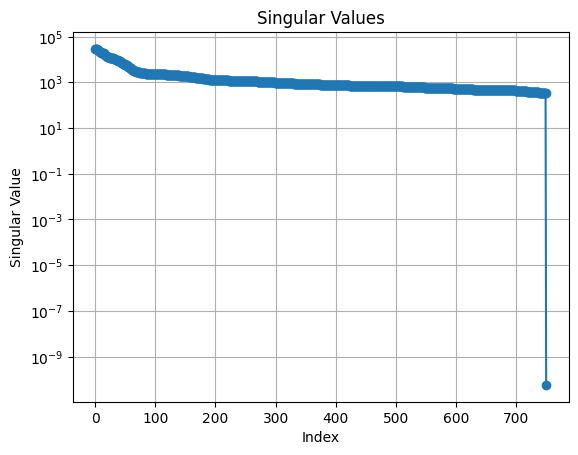

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Plot singular values
plt.plot(S, marker='o')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.title('Singular Values')
plt.grid(True)
plt.show()


plt.semilogy(S, marker='o')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.title('Singular Values')
plt.grid(True)
plt.show()


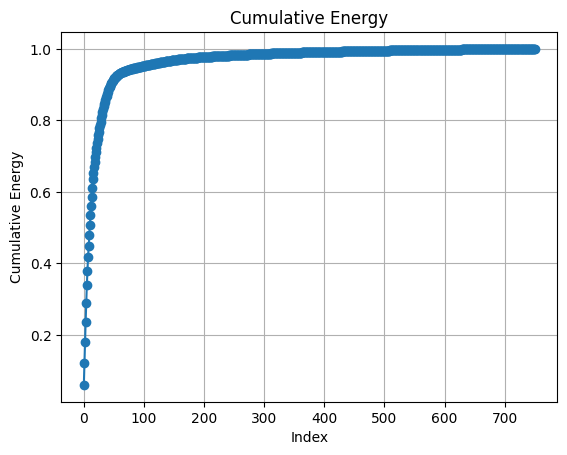

In [44]:
#plotting cumuative energy
cumulative_energy = np.cumsum(S**2) / np.sum(S**2)
plt.plot(cumulative_energy, marker='o')
plt.xlabel('Index')
plt.ylabel('Cumulative Energy')
plt.title('Cumulative Energy')
plt.grid(True)
plt.show()


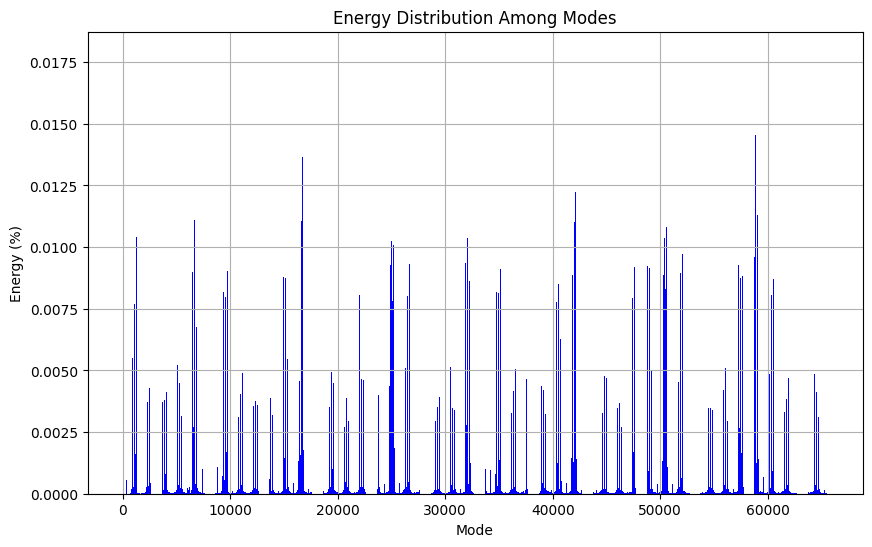

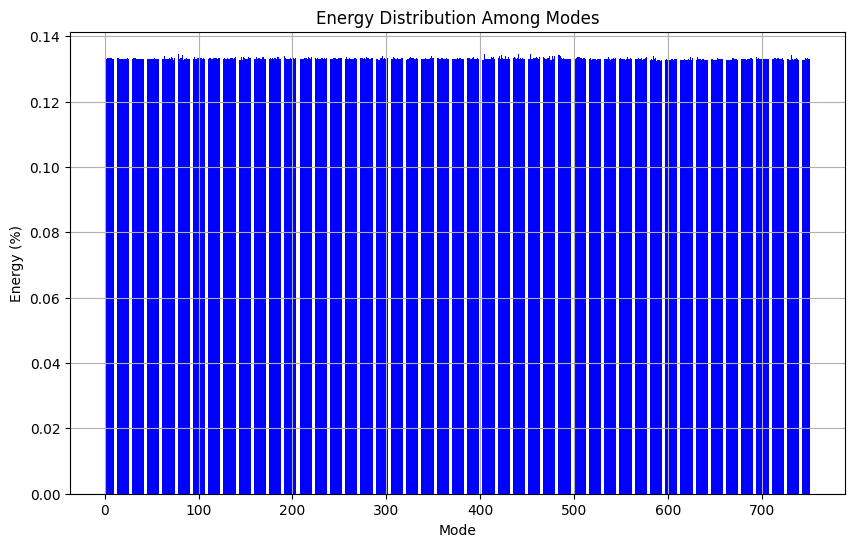

In [8]:
from torch import mode


def calculate_mode_energy(pod_modes, singular_values):
    # Calculate mode energy using the squared singular values
    mode_energy = np.sum((pod_modes * singular_values)**2, axis=1)
    # Normalize to represent the percentage of total energy
    total_energy = np.sum(mode_energy)
    mode_energy_percentage = mode_energy / total_energy * 100
    return mode_energy_percentage

def plot_mode_energy_distribution(mode_energy_percentage):
    num_modes = len(mode_energy_percentage)
    modes = np.arange(1, num_modes + 1)
    
    # Sort mode energy in descending order
    sorted_indices = np.argsort(mode_energy_percentage)[::-1]
    sorted_mode_energy_percentage = mode_energy_percentage[sorted_indices]
    sorted_modes = modes[sorted_indices]
    
    plt.figure(figsize=(10, 6))
    plt.bar(sorted_modes, sorted_mode_energy_percentage, color='b')
    plt.xlabel('Mode')
    plt.ylabel('Energy (%)')
    plt.title('Energy Distribution Among Modes')
    plt.grid(True)
    plt.show()

# Calculate mode energy
singular_values = np.linalg.norm(frames_stack, axis=(1, 2))
mode_U_energy_percentage = calculate_mode_energy(U, singular_values)
mode_Vt_energy_percentage = calculate_mode_energy(Vt, singular_values)
# Plot energy distribution
plot_mode_energy_distribution(mode_U_energy_percentage)
plot_mode_energy_distribution(mode_Vt_energy_percentage)

Top 10 Mode Energy (Descending Order):
Mode 1: 0.1429
Mode 2: 0.1428
Mode 3: 0.1427
Mode 4: 0.1425
Mode 5: 0.1424
Mode 6: 0.1422
Mode 7: 0.1419
Mode 8: 0.1417
Mode 9: 0.1417
Mode 10: 0.1415


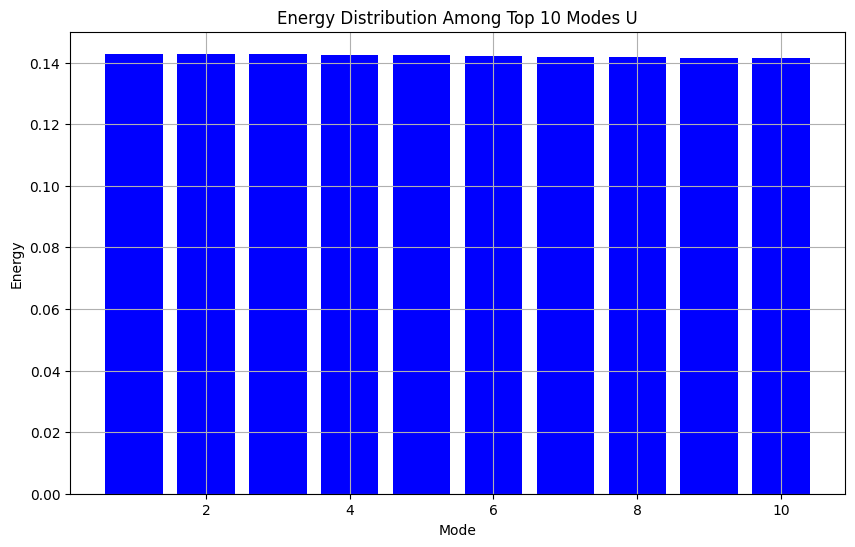

Top 10 Mode Energy (Descending Order):
Mode 1: 0.1429
Mode 2: 0.1428
Mode 3: 0.1427
Mode 4: 0.1425
Mode 5: 0.1424
Mode 6: 0.1422
Mode 7: 0.1419
Mode 8: 0.1417
Mode 9: 0.1417
Mode 10: 0.1415


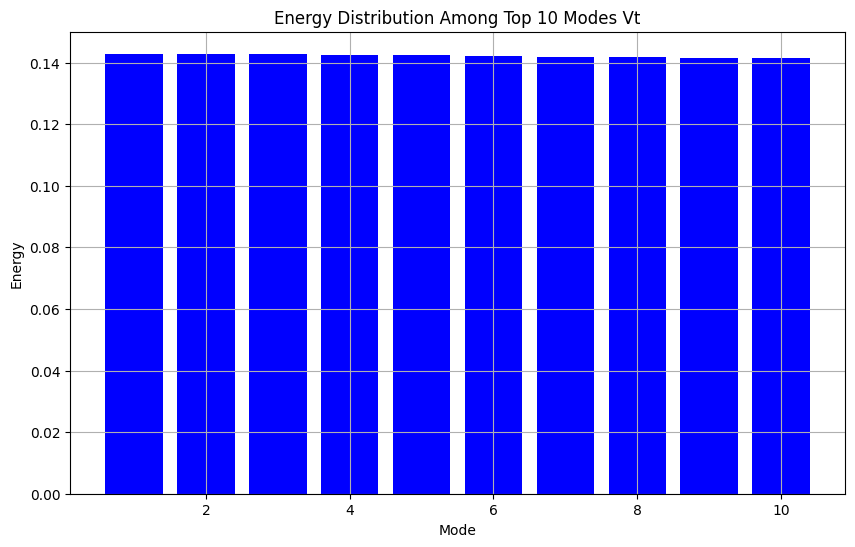

In [11]:
def calculate_mode_energy_sorted(pod_modes, singular_values):
    # Calculate mode energy using the squared singular values
    mode_energy = np.sum((pod_modes * singular_values)**2, axis=0)
    # Normalize to represent the percentage of total energy
    total_energy = np.sum(mode_energy)
    mode_energy_percentage = mode_energy / total_energy * 100
    
    # Sort mode energy and corresponding indices in descending order
    sorted_indices = np.argsort(mode_energy_percentage)[::-1]
    sorted_mode_energy_percentage = mode_energy_percentage[sorted_indices]
    
    return sorted_mode_energy_percentage[:10], sorted_indices[:10]

# Calculate sorted mode energy for the top 10 modes
singular_values = np.linalg.norm(frames_stack, axis=(1, 2))
top_10_mode_U_energy_percentage, top_10_indices = calculate_mode_energy_sorted(U, singular_values)

# Print the top 10 mode energies and indices
print("Top 10 Mode Energy (Descending Order):")
for i, energy in enumerate(top_10_mode_U_energy_percentage):
    print(f"Mode {i+1}: {energy:.4f}")

#plot
plt.figure(figsize=(10, 6))
plt.bar(np.arange(1, 11), top_10_mode_U_energy_percentage, color='b')
plt.xlabel('Mode')
plt.ylabel('Energy')
plt.title('Energy Distribution Among Top 10 Modes U')
plt.grid(True)
plt.show()

top_10_mode_Vt_energy_percentage, top_10_indices = calculate_mode_energy_sorted(Vt, singular_values)

# Print the top 10 mode energies and indices
print("Top 10 Mode Energy (Descending Order):")
for i, energy in enumerate(top_10_mode_Vt_energy_percentage):
    print(f"Mode {i+1}: {energy:.4f}")

#plot
plt.figure(figsize=(10, 6))
plt.bar(np.arange(1, 11), top_10_mode_Vt_energy_percentage, color='b')
plt.xlabel('Mode')
plt.ylabel('Energy')
plt.title('Energy Distribution Among Top 10 Modes Vt')
plt.grid(True)
plt.show()


In [20]:
print(U.shape)
print(Vt.shape)
print(mean_frame.shape)

(65536, 751)
(751, 751)
(65536,)


In [38]:
#printing the modes
for i in range(10):
    mode = U[:,i]
    print(mode)

[ 0.00029306  0.00148329  0.00121147 ... -0.00013126  0.00016805
 -0.00122615]
[ 0.00032099  0.00055456 -0.00043679 ... -0.00131702 -0.00114378
  0.00034639]
[-0.00085145 -0.00022534 -0.00019212 ...  0.00083721  0.00118353
 -0.00494907]
[-7.16928914e-05 -5.76548159e-04  3.27797943e-04 ...  1.61450010e-03
  2.42924731e-03 -5.26417169e-04]
[ 5.28227197e-04 -8.61463231e-05 -1.68920413e-04 ...  9.08048308e-04
  1.48876966e-04 -2.46632236e-04]
[-4.63030200e-04  7.07775483e-05 -2.44799520e-04 ...  2.81047106e-04
  1.24031143e-03  2.56953069e-03]
[-0.00040827  0.00086147  0.00094082 ...  0.00081267  0.00105914
  0.00026869]
[-1.37555372e-03  2.03715353e-04 -3.66950657e-04 ...  3.90235975e-04
 -2.02888752e-05  9.05469557e-04]
[ 2.51973088e-05  5.75831869e-04  5.28852982e-04 ...  1.00895652e-04
  1.37110189e-03 -1.97565096e-04]
[-0.00167612  0.00108102  0.00052149 ... -0.0005155  -0.00013252
  0.00166281]


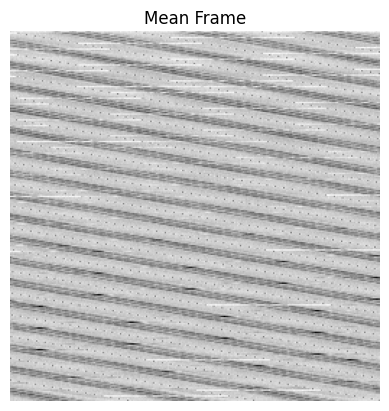

In [73]:
#reconstructing mean image
mean_frame_reconstructed = mean_frame.reshape(256, 256)
plt.imshow(mean_frame_reconstructed, cmap='gray')
plt.axis('off')
plt.title('Mean Frame')
plt.show()


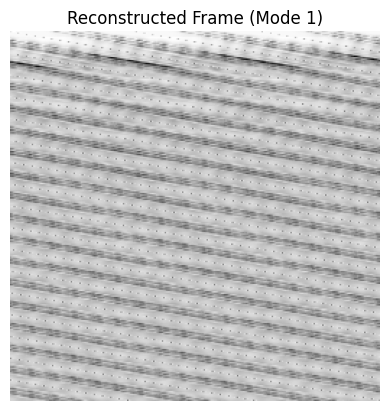

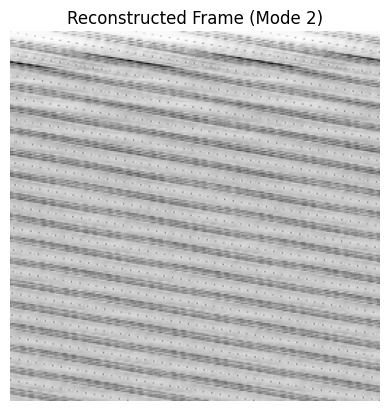

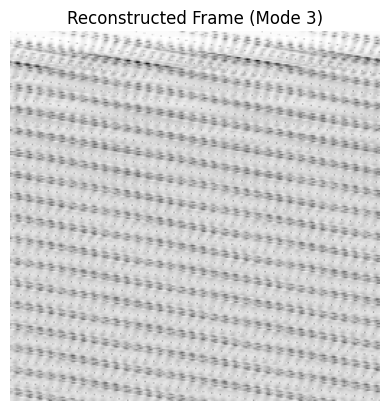

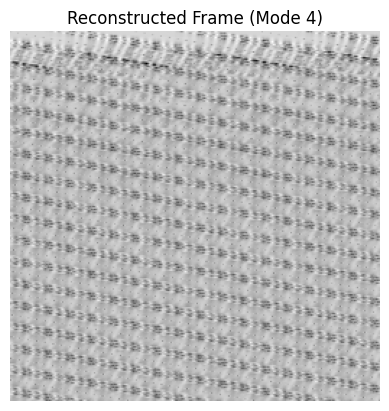

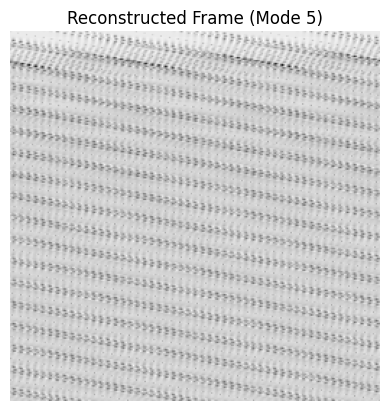

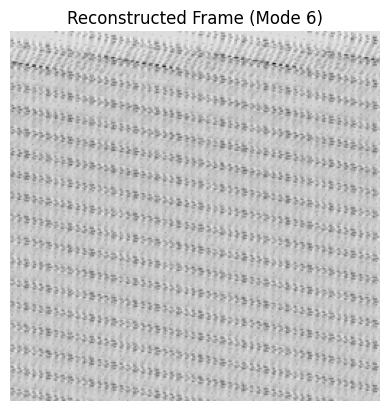

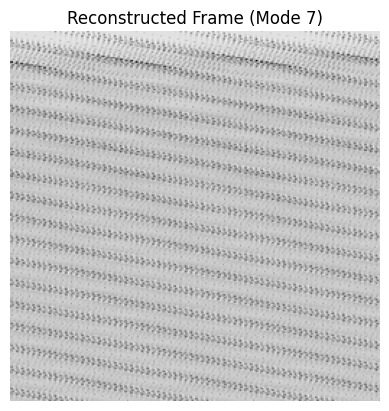

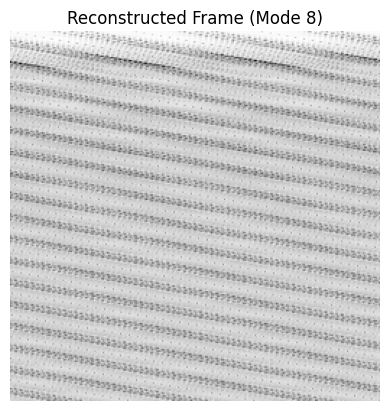

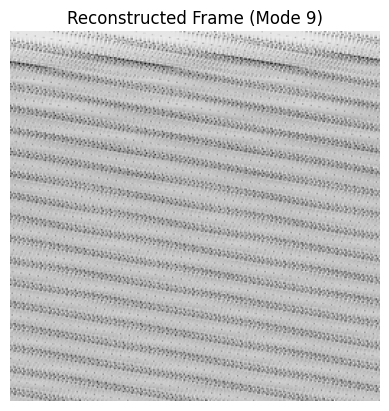

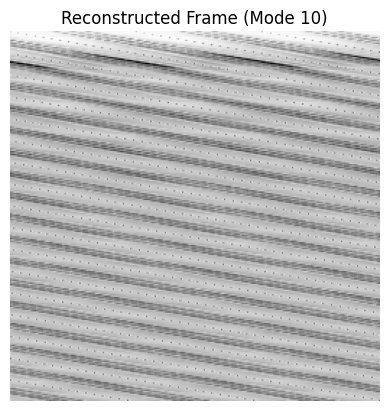

In [21]:
import matplotlib.pyplot as plt
from numpy import product

# Assuming U, S, Vt, and mean_frame are defined as before
for i in range(10):
    # Get the first column of U, the first singular value, and the first right singular vector
    u1 = U[:, i]
    s1 = S[i]
    v1 = Vt[i, :]

    # Reshape u1 back to the shape of the original frames
    u1_reshaped = np.reshape(u1, (256, 256))
    mean_frame=mean_frame.reshape(256,256)
    pdt=(np.outer(u1_reshaped, v1)).reshape(256,256,751)
    # Reconstruct the frame
    # reconstructed_frame = s1 * np.outer(u1_reshaped, v1) + mean_frame
    pd=pdt[:,:,i]
    # Plot the reconstructed frame
    plt.imshow(s1*pd + mean_frame, cmap='gray')
    plt.title('Reconstructed Frame (Mode {})'.format(i+1))
    plt.axis('off')
    plt.show()

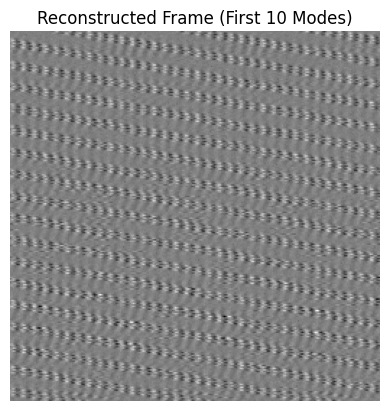

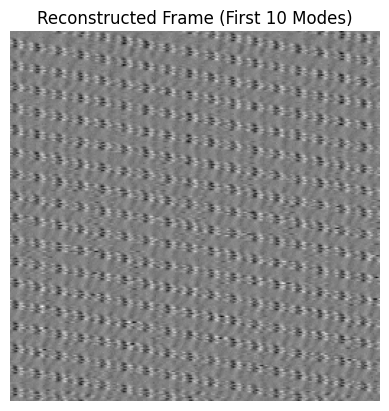

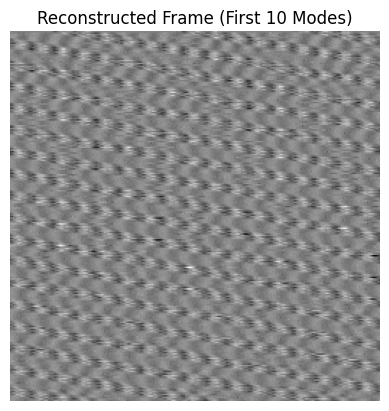

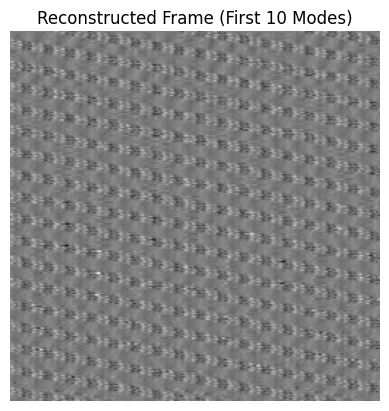

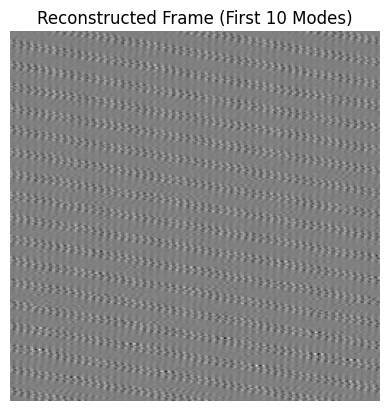

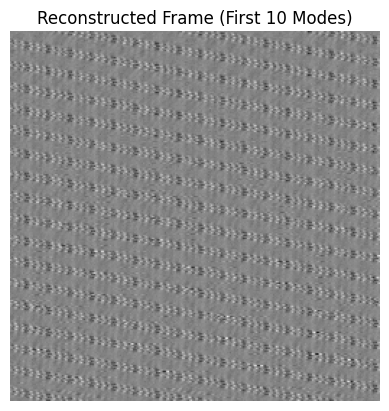

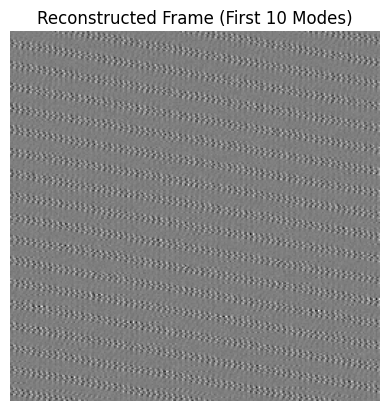

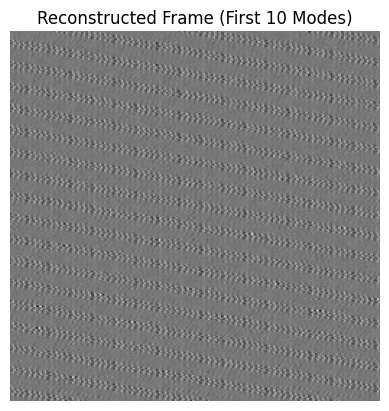

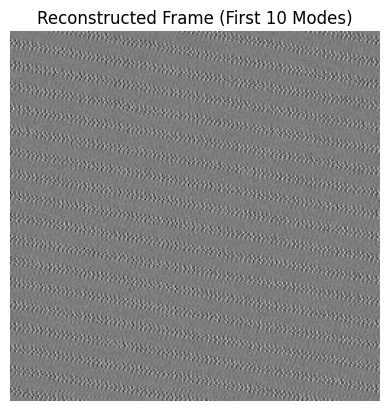

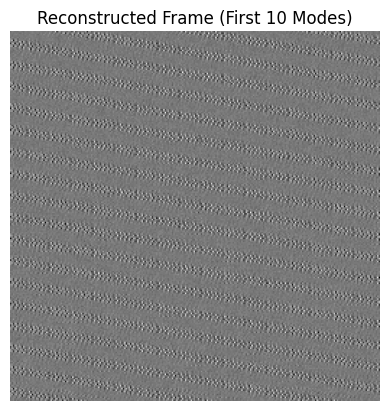

In [64]:
n_modes = 10  # Number of modes to include in the reconstruction

# Initialize the reconstructed frame as a 2D zero array
reconstructed_frame = np.zeros((65536, 751))

# Add the contribution of each mode
for i in range(n_modes):
    u = U[:, i]
    s = S[i]
    v = Vt[i, :]

    # Add the contribution of this mode to the reconstructed frame
    reconstructed_frame = s * np.outer(u, v)

    # Reshape the reconstructed frame back to the original shape
    reconstructed_frame = np.reshape(reconstructed_frame, (256, 256, 751))

    # Plot one of the reconstructed frames
    plt.imshow(reconstructed_frame[:, :, 0], cmap='gray')
    plt.title('Reconstructed Frame (First {} Modes)'.format(n_modes))
    plt.axis('off')
    plt.show()

In [ ]:
#Gaussian Noise:

# Electronic Noise: Often exhibits a Gaussian distribution due to the random nature of electronic fluctuations.
# Optical Noise: Imperfections like scattering and diffraction can contribute to noise with a Gaussian distribution.
# Environmental Noise: Variations in environmental conditions like temperature and pressure can introduce Gaussian noise into measurements.



import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_gaussian_noise(image, magnitude):
    max_intensity = np.max(image)
    noise = np.random.normal(scale=magnitude*max_intensity, size=image.shape)
    noisy_image = image.astype(np.float32) + noise
    noisy_image = np.clip(noisy_image, 0, 255)  # Clip values to [0, 255]
    return noisy_image.astype(np.uint8)

original_frames_dir = 'frames'
magnitudes =  [0.2, 0.4, 0.6, 0.8]  # Noise magnitudes as a fraction of maximum intensity

# Control flag for loop termination
stop = False

for filename in os.listdir(original_frames_dir):
    if stop:
        break

    if filename.endswith('.jpg'):
        original_frame_path = os.path.join(original_frames_dir, filename)
        original_frame = cv2.imread(original_frame_path)
        
        for magnitude in magnitudes:
            noisy_frames_dir = f'gauss_noisy_{int(magnitude*100)}_frames'
            
            # Check if directory already exists
            if os.path.isdir(noisy_frames_dir):
                print(f"Directory {noisy_frames_dir} already exists. Exiting loop.")
                stop = True
                break
            
            noisy_frames = []
            for channel in cv2.split(original_frame):
                noisy_channel = add_gaussian_noise(channel, magnitude)
                noisy_frames.append(noisy_channel)
            
            noisy_frame = cv2.merge(noisy_frames)
            
            os.makedirs(noisy_frames_dir, exist_ok=True)
            
            noisy_frame_filename = f'noisy_{int(magnitude*100)}_{filename}'
            noisy_frame_path = os.path.join(noisy_frames_dir, noisy_frame_filename)
            cv2.imwrite(noisy_frame_path, noisy_frame)

Directory gauss_noisy_20_frames already exists. Exiting loop.


In [ ]:
import numpy as np
from PIL import Image
import sys

def add_rayleigh_noise(image, scale=1.0):
    """
    Add Rayleigh noise to an image.
    
    Parameters:
        image (ndarray): The original image.
        scale (float): The scale parameter for the Rayleigh distribution.
    
    Returns:
        ndarray: The image with Rayleigh noise added.
    """
    # Generate Rayleigh noise
    noise = np.random.rayleigh(scale, size=image.shape)
    
    # Add the noise to the image
    noisy_image = image + noise
    
    # Clip the values to be between 0 and 255
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    
    return noisy_image

# Example usage:
# Assuming 'image' is your original image
# image_with_noise = add_rayleigh_noise(image)

# Directory containing original frames
original_frames_dir = 'frames'

# List of percentages for Rayleigh noise
percentages = [20, 40, 60, 80]

import sys

# Loop through each percentage
for percentage in percentages:
    # Calculate scale parameter for Rayleigh noise
    scale = percentage / 100.0

    # Create directory to save noisy frames
    noisy_frames_dir = f'rayleigh_noisy_{percentage}_frames'
    
    # Check if the directory already exists
    if os.path.isdir(noisy_frames_dir):
        print(f"Directory '{noisy_frames_dir}' already exists. Terminating.")
        sys.exit()

    os.makedirs(noisy_frames_dir, exist_ok=True)

    # Loop through each original frame
    for filename in os.listdir(original_frames_dir):
        if filename.endswith('.jpg'):
            # Load original frame
            original_frame_path = os.path.join(original_frames_dir, filename)
            original_frame = cv2.imread(original_frame_path)
            
            # Add Rayleigh noise to each color channel separately
            noisy_frames = []
            for channel in cv2.split(original_frame):
                # Scale the noise by the maximum value of the channel
                noisy_channel = add_rayleigh_noise(channel, scale * channel.max())
                noisy_frames.append(noisy_channel)
            
            # Merge noisy channels back into a color image
            noisy_frame = cv2.merge(noisy_frames)
            
            # Save noisy frame
            noisy_frame_filename = f'noisy_{percentage}_{filename}'
            noisy_frame_path = os.path.join(noisy_frames_dir, noisy_frame_filename)
            cv2.imwrite(noisy_frame_path, noisy_frame)

In [39]:
import os

def extract_frames_from_folder(folder_path, scale_size=(256, 256)):
    frames = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            frame_path = os.path.join(folder_path, filename)
            frame = cv2.imread(frame_path, cv2.IMREAD_GRAYSCALE)
            frame = cv2.resize(frame, scale_size)
            frames.append(frame)
    return frames

# Example usage
folder_path = r"gauss_noisy_20_frames"
frames = extract_frames_from_folder(folder_path)
frames_stack_noisy_20 = stack_frames(frames)
U_noisy_20, s_noisy_20, mean_frame_noisy_20, Vt_noisy_20 = perform_pod(frames_stack_noisy_20)

folder_path = r"gauss_noisy_40_frames"
frames = extract_frames_from_folder(folder_path)
frames_stack_noisy_40 = stack_frames(frames)
U_noisy_40, s_noisy_40, mean_frame_noisy_40, Vt_noisy_40 = perform_pod(frames_stack_noisy_40)

folder_path = r"gauss_noisy_60_frames"
frames = extract_frames_from_folder(folder_path)
frames_stack_noisy_60 = stack_frames(frames)
U_noisy_60, s_noisy_60, mean_frame_noisy_60, Vt_noisy_60 = perform_pod(frames_stack_noisy_60)

folder_path = r"gauss_noisy_80_frames"
frames = extract_frames_from_folder(folder_path)
frames_stack_noisy_80 = stack_frames(frames)
U_noisy_80, s_noisy_80, mean_frame_noisy_80, Vt_noisy_80 = perform_pod(frames_stack_noisy_80)


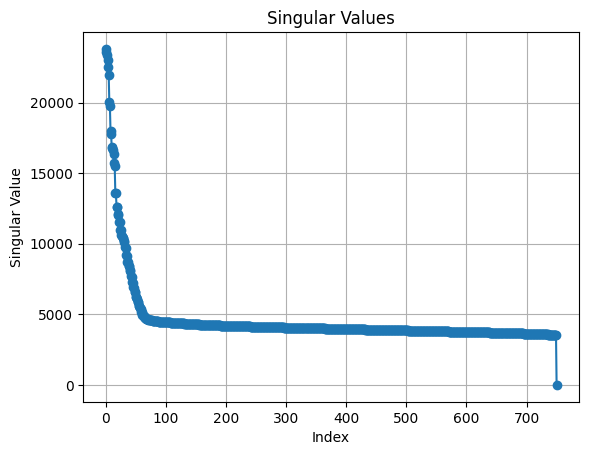

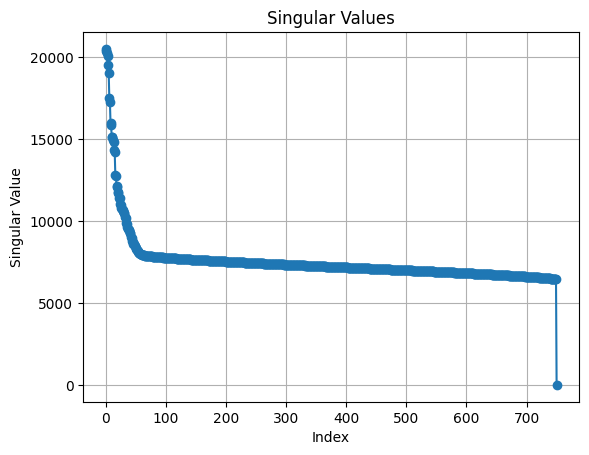

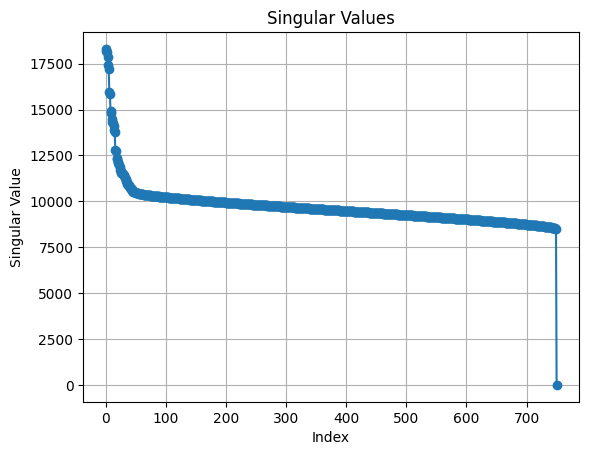

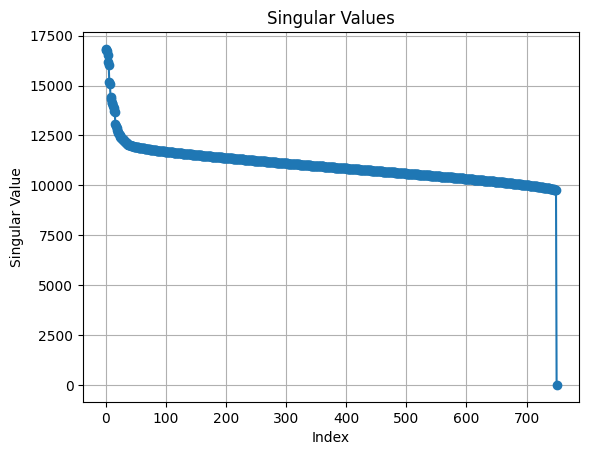

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Plot singular values
plt.plot(s_noisy_20, marker='o')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.title('Singular Values')
plt.grid(True)
plt.show()

plt.plot(s_noisy_40, marker='o')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.title('Singular Values')
plt.grid(True)
plt.show()

plt.plot(s_noisy_60, marker='o')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.title('Singular Values')
plt.grid(True)
plt.show()

plt.plot(s_noisy_80, marker='o')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.title('Singular Values')
plt.grid(True)
plt.show()



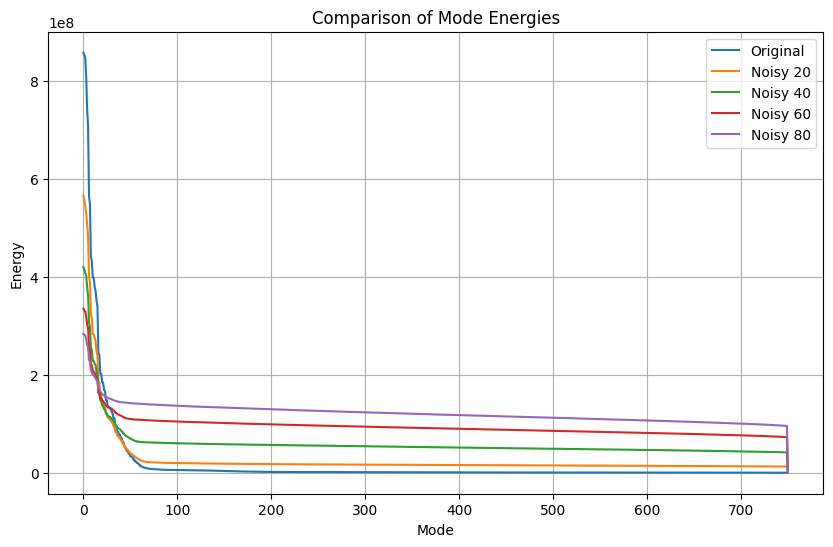

In [40]:
# Compute the energies of the modes for the original and noisy data
energies_orig = S**2
energies_noisy_20 = s_noisy_20**2
energies_noisy_40 = s_noisy_40**2
energies_noisy_60 = s_noisy_60**2
energies_noisy_80 = s_noisy_80**2

# Create a plot to compare the energies
plt.figure(figsize=(10, 6))
plt.plot(energies_orig, label='Original')
plt.plot(energies_noisy_20, label='Noisy 20')
plt.plot(energies_noisy_40, label='Noisy 40')
plt.plot(energies_noisy_60, label='Noisy 60')
plt.plot(energies_noisy_80, label='Noisy 80')
plt.title('Comparison of Mode Energies')
plt.xlabel('Mode')
plt.ylabel('Energy')
plt.legend()
plt.grid(True)
plt.show()

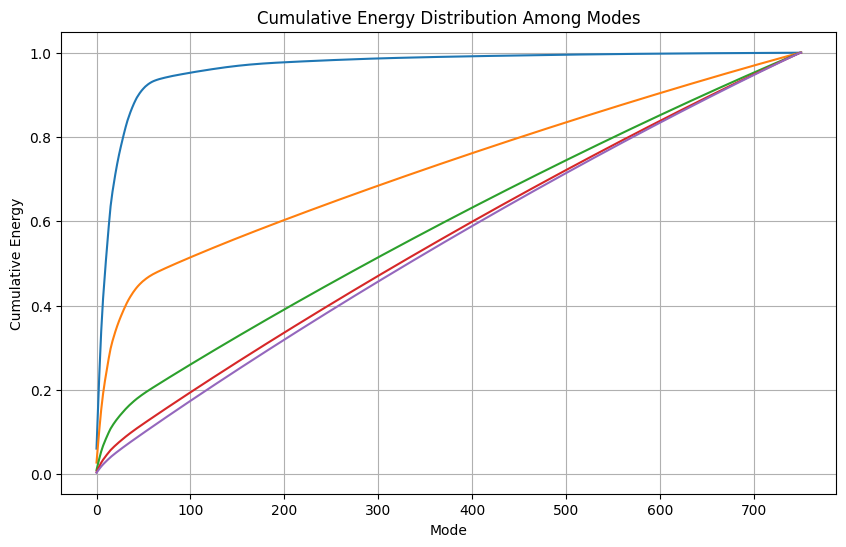

In [43]:
import matplotlib.pyplot as plt

# Compute the energy of each mode
energies_orig = S**2
energies_noisy_20 = s_noisy_20**2
energies_noisy_40 = s_noisy_40**2
energies_noisy_60 = s_noisy_60**2
energies_noisy_80 = s_noisy_80**2

# Compute the cumulative energy
cumulative_energies_orig = np.cumsum(energies_orig)
cumulative_energies_noisy_20 = np.cumsum(energies_noisy_20)
cumulative_energies_noisy_40 = np.cumsum(energies_noisy_40)
cumulative_energies_noisy_60 = np.cumsum(energies_noisy_60)
cumulative_energies_noisy_80 = np.cumsum(energies_noisy_80)

# Normalize the cumulative energies so they sum to 1
cumulative_energies_orig /= cumulative_energies_orig[-1]
cumulative_energies_noisy_20 /= cumulative_energies_noisy_20[-1]
cumulative_energies_noisy_40 /= cumulative_energies_noisy_40[-1]
cumulative_energies_noisy_60 /= cumulative_energies_noisy_60[-1]
cumulative_energies_noisy_80 /= cumulative_energies_noisy_80[-1]

# Create a scree plot
plt.figure(figsize=(10, 6))
plt.plot(cumulative_energies_orig, label='Original')
plt.plot(cumulative_energies_noisy_20, label='Noisy 20')
plt.plot(cumulative_energies_noisy_40, label='Noisy 40')
plt.plot(cumulative_energies_noisy_60, label='Noisy 60')
plt.plot(cumulative_energies_noisy_80, label='Noisy 80')
plt.title('Cumulative Energy Distribution Among Modes')
plt.xlabel('Mode')
plt.ylabel('Cumulative Energy')
plt.grid(True)
plt.show()

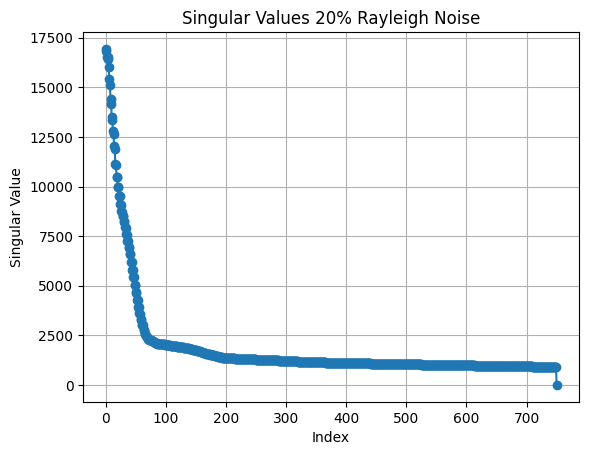

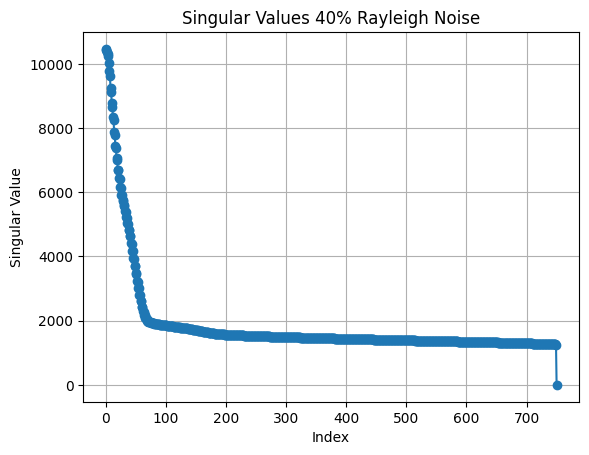

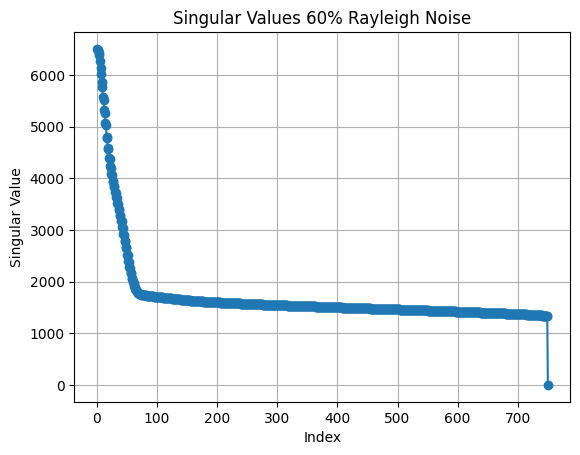

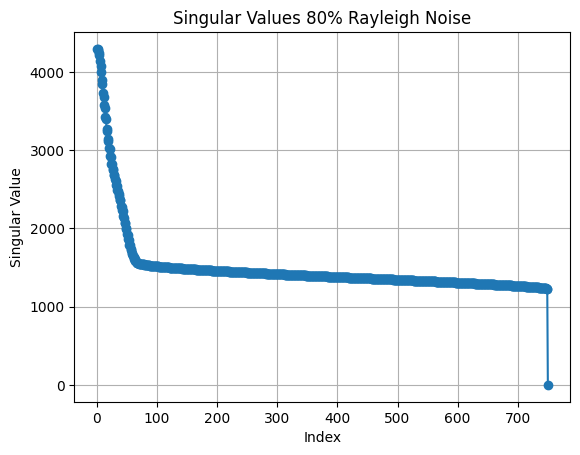

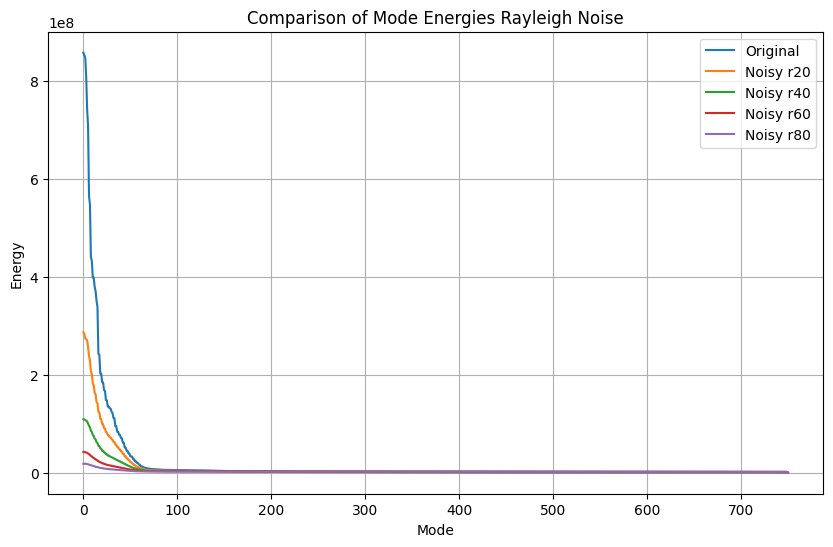

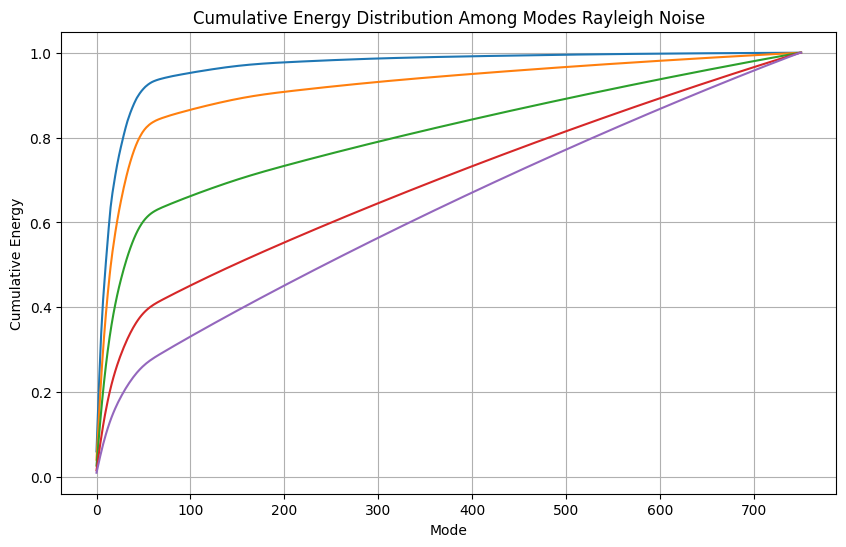

In [46]:
import os

def extract_frames_from_folder(folder_path, scale_size=(256, 256)):
    frames = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            frame_path = os.path.join(folder_path, filename)
            frame = cv2.imread(frame_path, cv2.IMREAD_GRAYSCALE)
            frame = cv2.resize(frame, scale_size)
            frames.append(frame)
    return frames

# Example usage
folder_path = r"rayleigh_noisy_20_frames"
frames = extract_frames_from_folder(folder_path)
frames_stack_noisy_r20 = stack_frames(frames)
U_noisy_r20, s_noisy_r20, mean_frame_noisy_r20, Vt_noisy_r20 = perform_pod(frames_stack_noisy_r20)

folder_path = r"rayleigh_noisy_40_frames"
frames = extract_frames_from_folder(folder_path)
frames_stack_noisy_r40 = stack_frames(frames)
U_noisy_r40, s_noisy_r40, mean_frame_noisy_r40, Vt_noisy_r40 = perform_pod(frames_stack_noisy_r40)

folder_path = r"rayleigh_noisy_60_frames"
frames = extract_frames_from_folder(folder_path)
frames_stack_noisy_r60 = stack_frames(frames)
U_noisy_r60, s_noisy_r60, mean_frame_noisy_r60, Vt_noisy_r60 = perform_pod(frames_stack_noisy_r60)

folder_path = r"rayleigh_noisy_80_frames"
frames = extract_frames_from_folder(folder_path)
frames_stack_noisy_r80 = stack_frames(frames)
U_noisy_r80, s_noisy_r80, mean_frame_noisy_r80, Vt_noisy_r80 = perform_pod(frames_stack_noisy_r80)

import matplotlib.pyplot as plt
import numpy as np

# Plot singular values
plt.plot(s_noisy_r20, marker='o')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.title('Singular Values 20% Rayleigh Noise')
plt.grid(True)
plt.show()

plt.plot(s_noisy_r40, marker='o')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.title('Singular Values 40% Rayleigh Noise')
plt.grid(True)
plt.show()

plt.plot(s_noisy_r60, marker='o')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.title('Singular Values 60% Rayleigh Noise')
plt.grid(True)
plt.show()

plt.plot(s_noisy_r80, marker='o')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.title('Singular Values 80% Rayleigh Noise')
plt.grid(True)
plt.show()


# Compute the energies of the modes for the original and noisy data
energies_orig = S**2
energies_noisy_r20 = s_noisy_r20**2
energies_noisy_r40 = s_noisy_r40**2
energies_noisy_r60 = s_noisy_r60**2
energies_noisy_r80 = s_noisy_r80**2

# Create a plot to compare the energies
plt.figure(figsize=(10, 6))
plt.plot(energies_orig, label='Original')
plt.plot(energies_noisy_r20, label='Noisy r20')
plt.plot(energies_noisy_r40, label='Noisy r40')
plt.plot(energies_noisy_r60, label='Noisy r60')
plt.plot(energies_noisy_r80, label='Noisy r80')
plt.title('Comparison of Mode Energies Rayleigh Noise')
plt.xlabel('Mode')
plt.ylabel('Energy')
plt.legend()
plt.grid(True)
plt.show()
import matplotlib.pyplot as plt

# Compute the energy of each mode
energies_orig = S**2
energies_noisy_r20 = s_noisy_r20**2
energies_noisy_r40 = s_noisy_r40**2
energies_noisy_r60 = s_noisy_r60**2
energies_noisy_r80 = s_noisy_r80**2

# Compute the cumulative energy
cumulative_energies_orig = np.cumsum(energies_orig)
cumulative_energies_noisy_r20 = np.cumsum(energies_noisy_r20)
cumulative_energies_noisy_r40 = np.cumsum(energies_noisy_r40)
cumulative_energies_noisy_r60 = np.cumsum(energies_noisy_r60)
cumulative_energies_noisy_r80 = np.cumsum(energies_noisy_r80)

# Normalize the cumulative energies so they sum to 1
cumulative_energies_orig /= cumulative_energies_orig[-1]
cumulative_energies_noisy_r20 /= cumulative_energies_noisy_r20[-1]
cumulative_energies_noisy_r40 /= cumulative_energies_noisy_r40[-1]
cumulative_energies_noisy_r60 /= cumulative_energies_noisy_r60[-1]
cumulative_energies_noisy_r80 /= cumulative_energies_noisy_r80[-1]

# Create a scree plot
plt.figure(figsize=(10, 6))
plt.plot(cumulative_energies_orig, label='Original')
plt.plot(cumulative_energies_noisy_r20, label='Noisy 20')
plt.plot(cumulative_energies_noisy_r40, label='Noisy 40')
plt.plot(cumulative_energies_noisy_r60, label='Noisy 60')
plt.plot(cumulative_energies_noisy_r80, label='Noisy 80')
plt.title('Cumulative Energy Distribution Among Modes Rayleigh Noise')
plt.xlabel('Mode')
plt.ylabel('Cumulative Energy')
plt.grid(True)
plt.show()

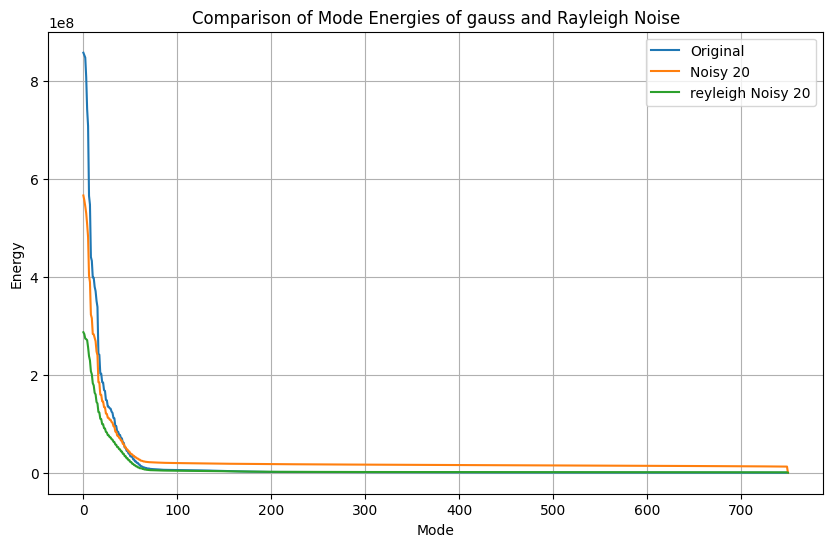

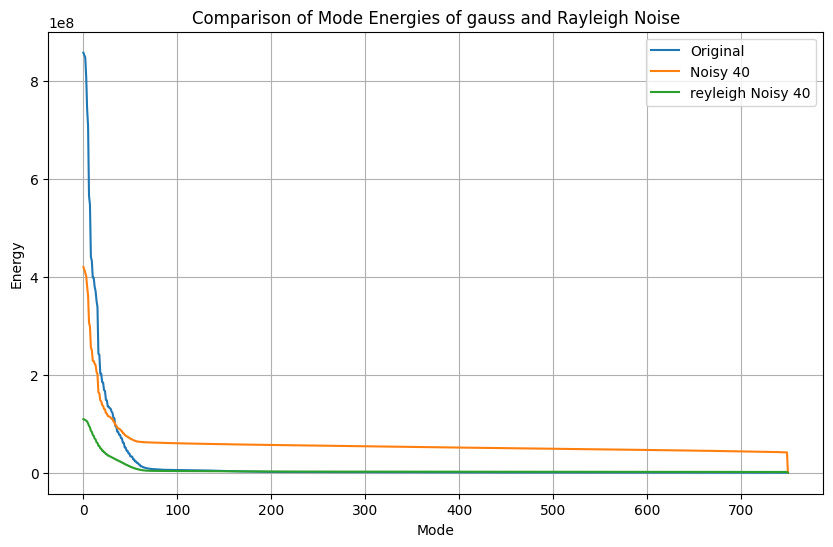

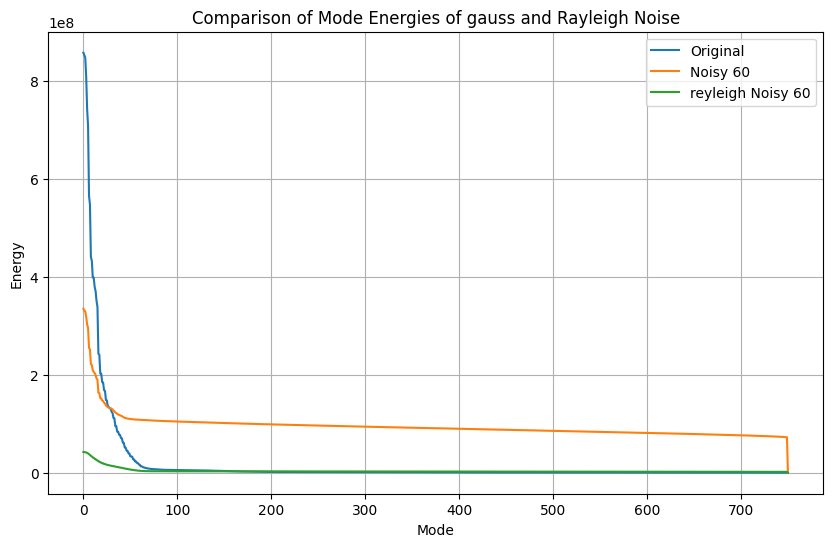

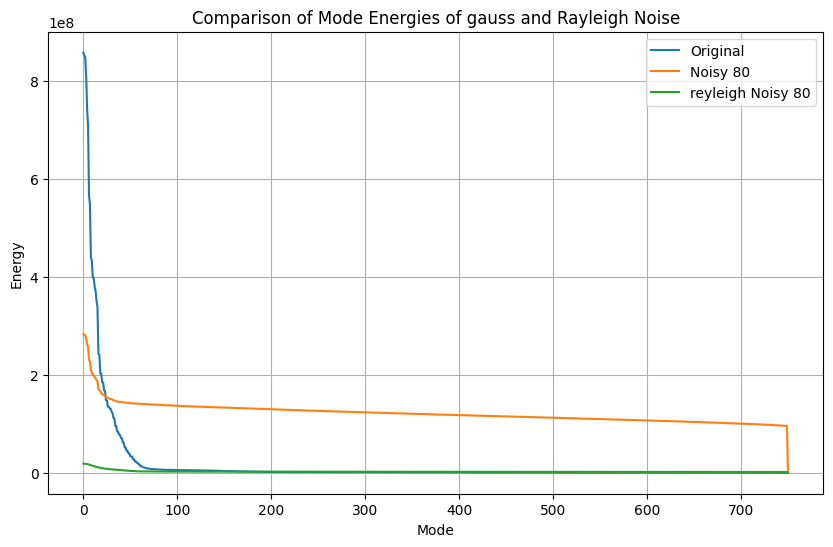

In [49]:
#comparative plots of reyleigh and gauss noise
plt.figure(figsize=(10, 6))
plt.plot(energies_orig, label='Original')
plt.plot(energies_noisy_20, label='Noisy 20')
plt.plot(energies_noisy_r20, label='reyleigh Noisy 20')
plt.title('Comparison of Mode Energies of gauss and Rayleigh Noise')
plt.xlabel('Mode')
plt.ylabel('Energy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(energies_orig, label='Original')
plt.plot(energies_noisy_40, label='Noisy 40')
plt.plot(energies_noisy_r40, label='reyleigh Noisy 40')
plt.title('Comparison of Mode Energies of gauss and Rayleigh Noise')
plt.xlabel('Mode')
plt.ylabel('Energy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(energies_orig, label='Original')
plt.plot(energies_noisy_60, label='Noisy 60')
plt.plot(energies_noisy_r60, label='reyleigh Noisy 60')
plt.title('Comparison of Mode Energies of gauss and Rayleigh Noise')
plt.xlabel('Mode')
plt.ylabel('Energy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(energies_orig, label='Original')
plt.plot(energies_noisy_80, label='Noisy 80')
plt.plot(energies_noisy_r80, label='reyleigh Noisy 80')
plt.title('Comparison of Mode Energies of gauss and Rayleigh Noise')
plt.xlabel('Mode')
plt.ylabel('Energy')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
import os
import cv2

# Directory containing noisy images
noisy_images_dir = 'gauss_noisy_20_frames'

# Directory to save denoised images
denoised_images_dir = 'gauss_denoised_20_frames'
os.makedirs(denoised_images_dir, exist_ok=True)

# Loop through each noisy image
for filename in os.listdir(noisy_images_dir):
    if filename.endswith('.jpg'):
        # Load noisy image
        noisy_image_path = os.path.join(noisy_images_dir, filename)
        noisy_image = cv2.imread(noisy_image_path)
        
        # Apply Gaussian blur filter for denoising
        denoised_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)
        
        # Save denoised image
        denoised_image_path = os.path.join(denoised_images_dir, filename)
        cv2.imwrite(denoised_image_path, denoised_image)

In [55]:
import os
import cv2

# Directory containing noisy images
noisy_images_dir = 'gauss_noisy_40_frames'

# Directory to save denoised images
denoised_images_dir = 'gauss_denoised_40_frames'
os.makedirs(denoised_images_dir, exist_ok=True)

# Loop through each noisy image
for filename in os.listdir(noisy_images_dir):
    if filename.endswith('.jpg'):
        # Load noisy image
        noisy_image_path = os.path.join(noisy_images_dir, filename)
        noisy_image = cv2.imread(noisy_image_path)
        
        # Apply Gaussian blur filter for denoising
        denoised_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)
        
        # Save denoised image
        denoised_image_path = os.path.join(denoised_images_dir, filename)
        cv2.imwrite(denoised_image_path, denoised_image)

In [56]:
import os
import cv2

# Directory containing noisy images
noisy_images_dir = 'gauss_noisy_60_frames'

# Directory to save denoised images
denoised_images_dir = 'gauss_denoised_60_frames'
os.makedirs(denoised_images_dir, exist_ok=True)

# Loop through each noisy image
for filename in os.listdir(noisy_images_dir):
    if filename.endswith('.jpg'):
        # Load noisy image
        noisy_image_path = os.path.join(noisy_images_dir, filename)
        noisy_image = cv2.imread(noisy_image_path)
        
        # Apply Gaussian blur filter for denoising
        denoised_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)
        
        # Save denoised image
        denoised_image_path = os.path.join(denoised_images_dir, filename)
        cv2.imwrite(denoised_image_path, denoised_image)

In [57]:
import os
import cv2

# Directory containing noisy images
noisy_images_dir = 'gauss_noisy_80_frames'

# Directory to save denoised images
denoised_images_dir = 'gauss_denoised_80_frames'
os.makedirs(denoised_images_dir, exist_ok=True)

# Loop through each noisy image
for filename in os.listdir(noisy_images_dir):
    if filename.endswith('.jpg'):
        # Load noisy image
        noisy_image_path = os.path.join(noisy_images_dir, filename)
        noisy_image = cv2.imread(noisy_image_path)
        
        # Apply Gaussian blur filter for denoising
        denoised_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)
        
        # Save denoised image
        denoised_image_path = os.path.join(denoised_images_dir, filename)
        cv2.imwrite(denoised_image_path, denoised_image)

In [66]:
# Example usage
folder_path = r"gauss_denoised_20_frames"
frames = extract_frames_from_folder(folder_path)
frames_stack_denoised_20 = stack_frames(frames)
U_denoised_20, s_denoised_20, mean_frame_denoised_20, Vt_denoised_20 = perform_pod(frames_stack_denoised_20)

folder_path = r"gauss_denoised_40_frames"
frames = extract_frames_from_folder(folder_path)
frames_stack_denoised_40 = stack_frames(frames)
U_denoised_40, s_denoised_40, mean_frame_denoised_40, Vt_denoised_40 = perform_pod(frames_stack_denoised_40)

folder_path = r"gauss_denoised_60_frames"
frames = extract_frames_from_folder(folder_path)
frames_stack_denoised_60 = stack_frames(frames)
U_denoised_60, s_denoised_60, mean_frame_denoised_60, Vt_denoised_60 = perform_pod(frames_stack_denoised_60)

folder_path = r"gauss_denoised_80_frames"
frames = extract_frames_from_folder(folder_path)
frames_stack_denoised_80 = stack_frames(frames)
U_denoised_80, s_denoised_80, mean_frame_denoised_80, Vt_denoised_80 = perform_pod(frames_stack_denoised_80)

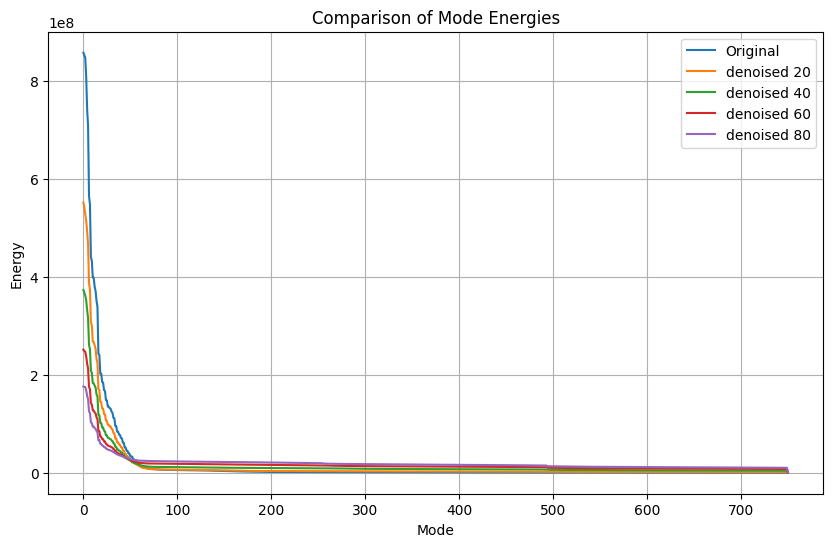

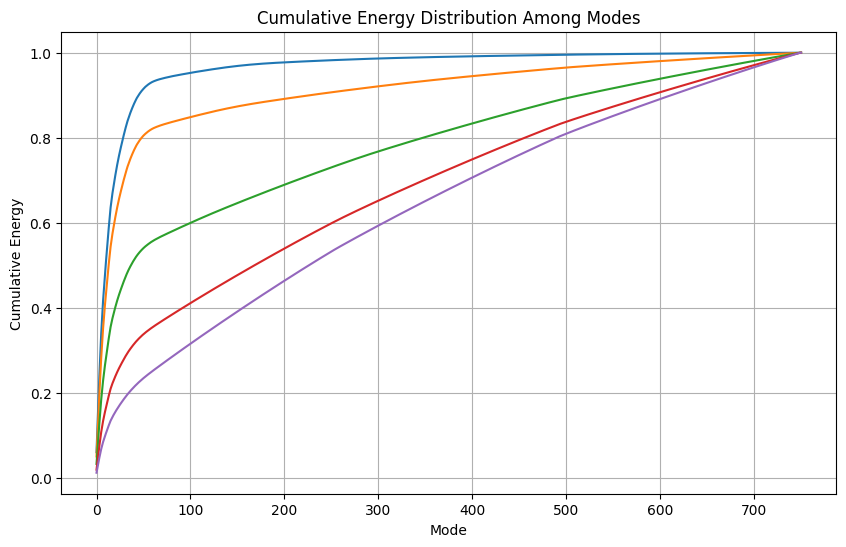

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Compute the energies of the modes for the original and noisy data
energies_orig = S**2
energies_denoised_20 = s_denoised_20**2
energies_denoised_40 = s_denoised_40**2
energies_denoised_60 = s_denoised_60**2
energies_denoised_80 = s_denoised_80**2

# Create a plot to compare the energies
plt.figure(figsize=(10, 6))
plt.plot(energies_orig, label='Original')
plt.plot(energies_denoised_20, label='denoised 20')
plt.plot(energies_denoised_40, label='denoised 40')
plt.plot(energies_denoised_60, label='denoised 60')
plt.plot(energies_denoised_80, label='denoised 80')
plt.title('Comparison of Mode Energies')
plt.xlabel('Mode')
plt.ylabel('Energy')
plt.legend()
plt.grid(True)
plt.show()
import matplotlib.pyplot as plt

# Compute the cumulative energy
cumulative_energies_orig = np.cumsum(energies_orig)
cumulative_energies_denoised_20 = np.cumsum(energies_denoised_20)
cumulative_energies_denoised_40 = np.cumsum(energies_denoised_40)
cumulative_energies_denoised_60 = np.cumsum(energies_denoised_60)
cumulative_energies_denoised_80 = np.cumsum(energies_denoised_80)

# Normalize the cumulative energies so they sum to 1
cumulative_energies_orig /= cumulative_energies_orig[-1]
cumulative_energies_denoised_20 /= cumulative_energies_denoised_20[-1]
cumulative_energies_denoised_40 /= cumulative_energies_denoised_40[-1]
cumulative_energies_denoised_60 /= cumulative_energies_denoised_60[-1]
cumulative_energies_denoised_80 /= cumulative_energies_denoised_80[-1]

# Create a scree plot
plt.figure(figsize=(10, 6))
plt.plot(cumulative_energies_orig, label='Original')
plt.plot(cumulative_energies_denoised_20, label='denoised 20')
plt.plot(cumulative_energies_denoised_40, label='denoised 40')
plt.plot(cumulative_energies_denoised_60, label='denoised 60')
plt.plot(cumulative_energies_denoised_80, label='denoised 80')
plt.title('Cumulative Energy Distribution Among Modes')
plt.xlabel('Mode')
plt.ylabel('Cumulative Energy')
plt.grid(True)
plt.show()



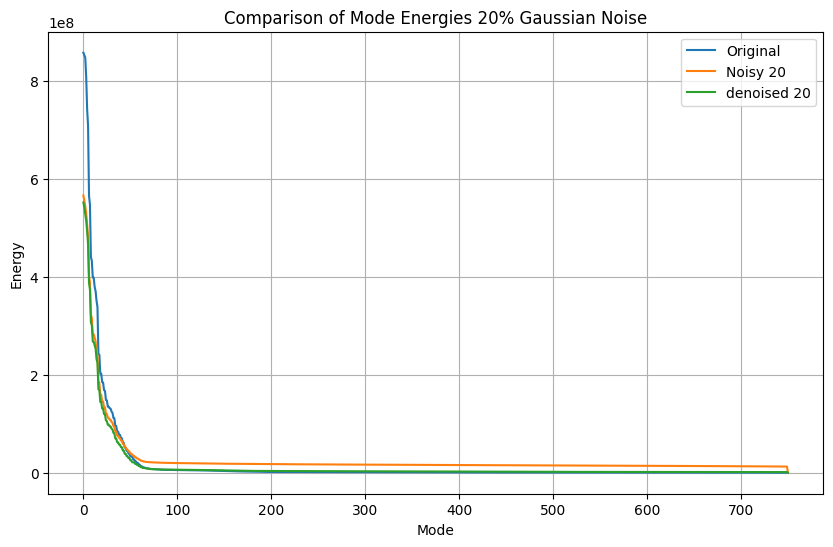

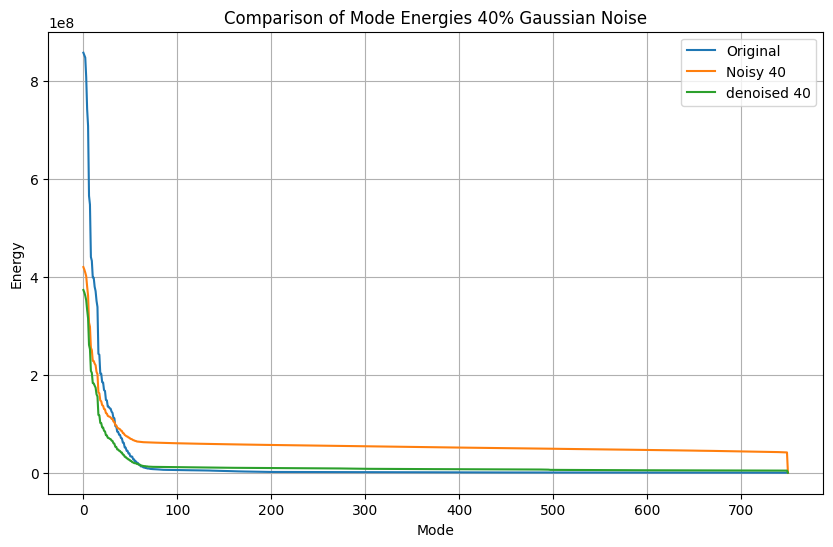

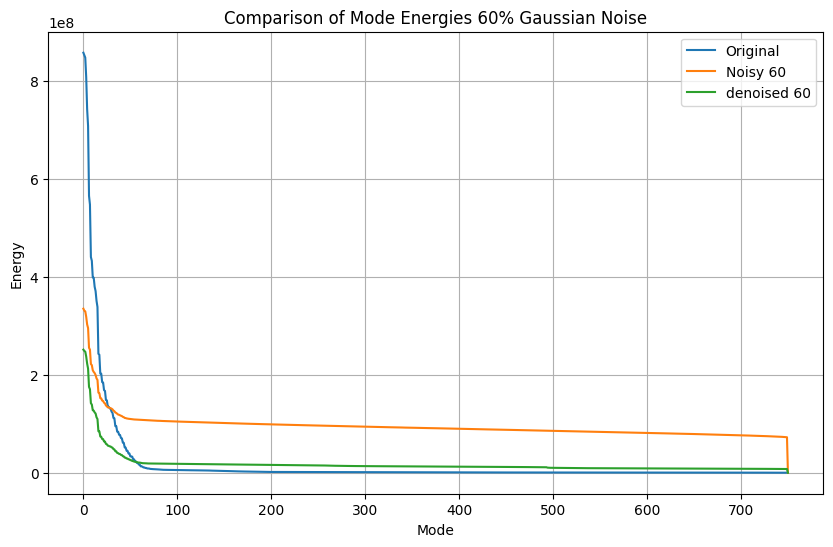

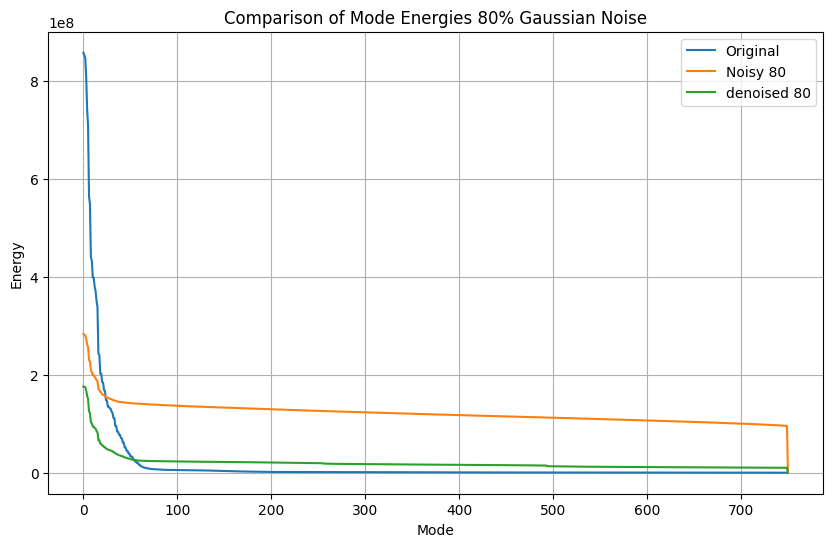

In [71]:
# Create a plot to compare the energies
plt.figure(figsize=(10, 6))
plt.plot(energies_orig, label='Original')
plt.plot(energies_noisy_20, label='Noisy 20')
plt.plot(energies_denoised_20, label='denoised 20')
plt.title('Comparison of Mode Energies 20% Gaussian Noise')
plt.xlabel('Mode')
plt.ylabel('Energy')
plt.legend()
plt.grid(True)
plt.show()

# Create a plot to compare the energies
plt.figure(figsize=(10, 6))
plt.plot(energies_orig, label='Original')
plt.plot(energies_noisy_40, label='Noisy 40')
plt.plot(energies_denoised_40, label='denoised 40')
plt.title('Comparison of Mode Energies 40% Gaussian Noise')
plt.xlabel('Mode')
plt.ylabel('Energy')
plt.legend()
plt.grid(True)
plt.show()

# Create a plot to compare the energies
plt.figure(figsize=(10, 6))
plt.plot(energies_orig, label='Original')
plt.plot(energies_noisy_60, label='Noisy 60')
plt.plot(energies_denoised_60, label='denoised 60')
plt.title('Comparison of Mode Energies 60% Gaussian Noise')
plt.xlabel('Mode')
plt.ylabel('Energy')
plt.legend()
plt.grid(True)
plt.show()

# Create a plot to compare the energies
plt.figure(figsize=(10, 6))
plt.plot(energies_orig, label='Original')
plt.plot(energies_noisy_80, label='Noisy 80')
plt.plot(energies_denoised_80, label='denoised 80')
plt.title('Comparison of Mode Energies 80% Gaussian Noise')
plt.xlabel('Mode')
plt.ylabel('Energy')
plt.legend()
plt.grid(True)
plt.show()

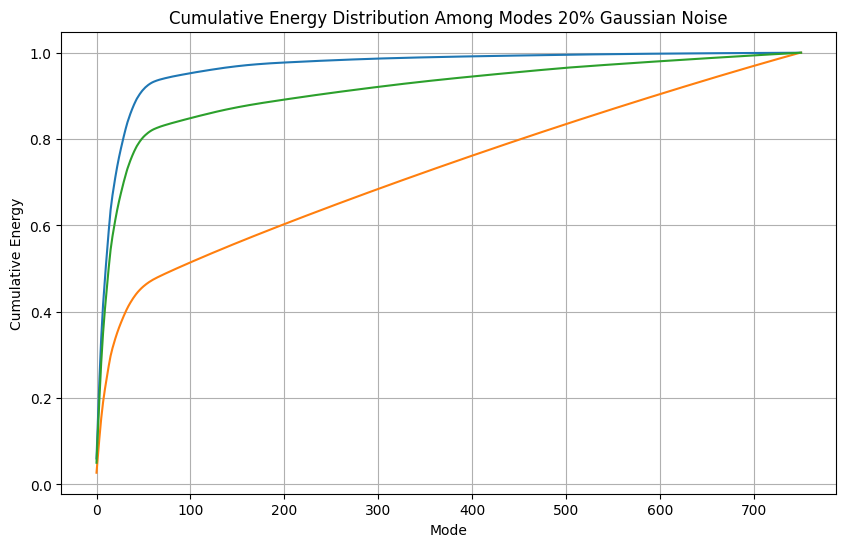

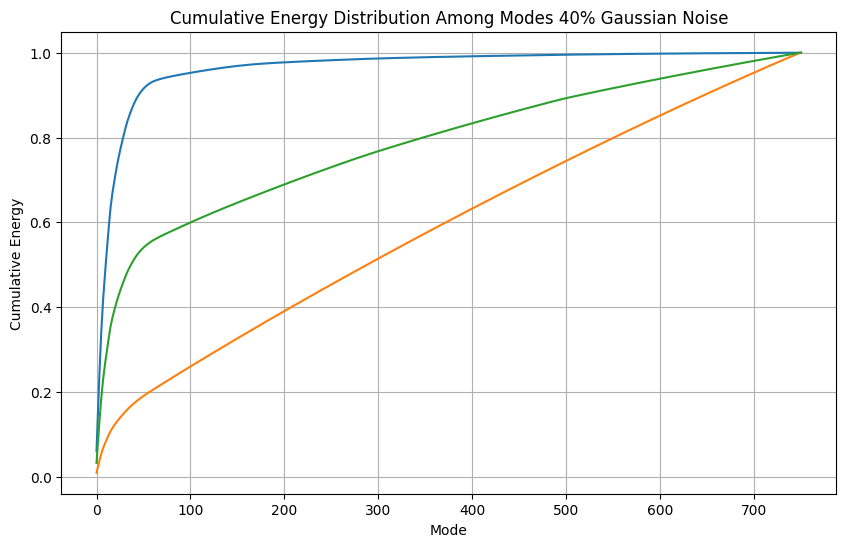

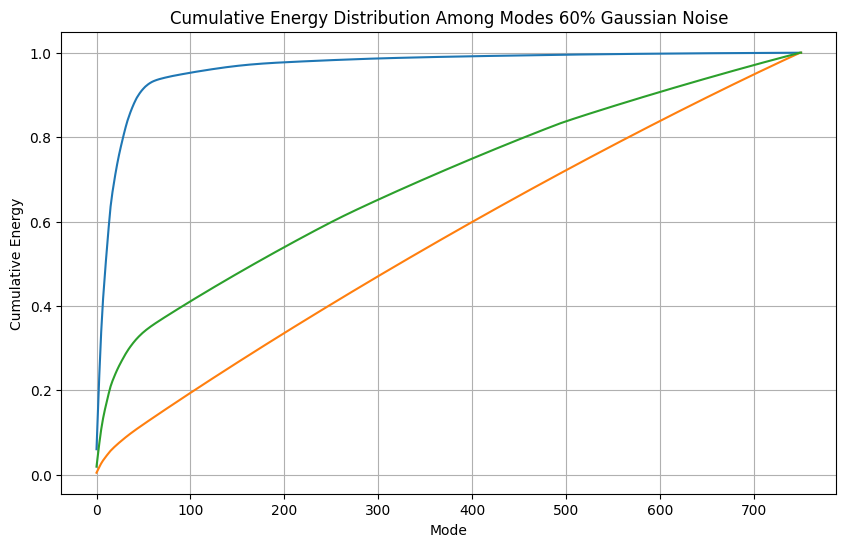

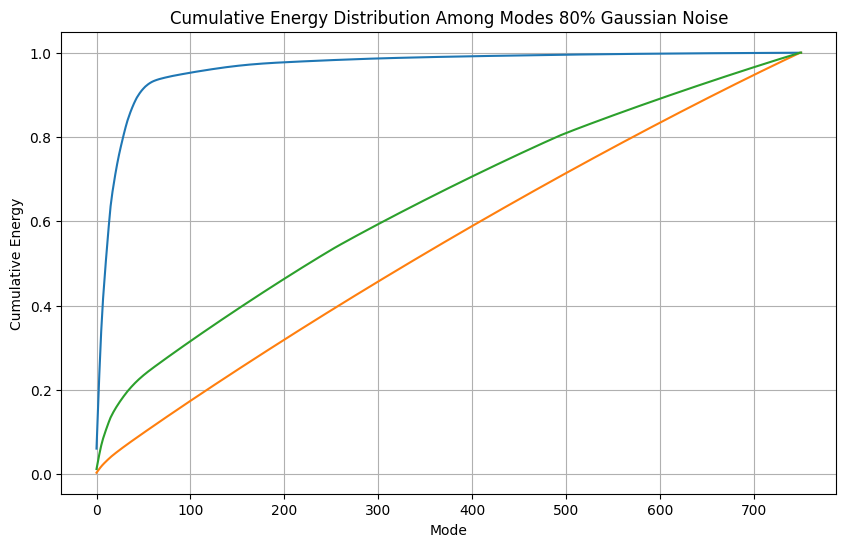

In [72]:
# Create a scree plot
plt.figure(figsize=(10, 6))
plt.plot(cumulative_energies_orig, label='Original')
plt.plot(cumulative_energies_noisy_20, label='noisy 20')
plt.plot(cumulative_energies_denoised_20, label='denoised 20')
plt.title('Cumulative Energy Distribution Among Modes 20% Gaussian Noise')
plt.xlabel('Mode')
plt.ylabel('Cumulative Energy')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(cumulative_energies_orig, label='Original')
plt.plot(cumulative_energies_noisy_40, label='noisy 40')
plt.plot(cumulative_energies_denoised_40, label='denoised 40')
plt.title('Cumulative Energy Distribution Among Modes 40% Gaussian Noise')
plt.xlabel('Mode')
plt.ylabel('Cumulative Energy')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(cumulative_energies_orig, label='Original')
plt.plot(cumulative_energies_noisy_60, label='noisy 60')
plt.plot(cumulative_energies_denoised_60, label='denoised 60')
plt.title('Cumulative Energy Distribution Among Modes 60% Gaussian Noise')
plt.xlabel('Mode')
plt.ylabel('Cumulative Energy')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(cumulative_energies_orig, label='Original')
plt.plot(cumulative_energies_noisy_80, label='noisy 80')
plt.plot(cumulative_energies_denoised_80, label='denoised 80')
plt.title('Cumulative Energy Distribution Among Modes 80% Gaussian Noise')
plt.xlabel('Mode')
plt.ylabel('Cumulative Energy')
plt.grid(True)
plt.show()